In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('customer_segmentation.csv')
data

,name,gender,age,annual_income,spending_frequency,actual_spending
0,Teresa Williams MD,Female,42,53936,0.9,13227.120
1,Christine Myers,Female,49,82468,0.6,12674.040
2,Dwayne Moreno,Male,55,56941,0.3,5354.115
3,Amy Norton,Female,24,60651,0.2,2606.510
4,Tonya Adams,Male,64,81884,0.9,18984.780
...,...,...,...,...,...,...
995,Jason Haas,Female,42,98170,0.7,17435.950
996,Sharon Valdez,Male,39,59174,0.9,11662.830
997,Andrew Taylor,Male,50,59808,0.4,7196.160
998,Jessica Johnson,Female,50,58272,0.7,13939.520


In [28]:
data.head()

,name,gender,age,annual_income,spending_frequency,actual_spending
0,Teresa Williams MD,Female,42,53936,0.9,13227.120
1,Christine Myers,Female,49,82468,0.6,12674.040
2,Dwayne Moreno,Male,55,56941,0.3,5354.115
3,Amy Norton,Female,24,60651,0.2,2606.510
4,Tonya Adams,Male,64,81884,0.9,18984.780


In [29]:
data.tail()

,name,gender,age,annual_income,spending_frequency,actual_spending
995,Jason Haas,Female,42,98170,0.7,17435.95
996,Sharon Valdez,Male,39,59174,0.9,11662.83
997,Andrew Taylor,Male,50,59808,0.4,7196.16
998,Jessica Johnson,Female,50,58272,0.7,13939.52
999,Brian Williams,Male,38,32512,0.5,8312.80


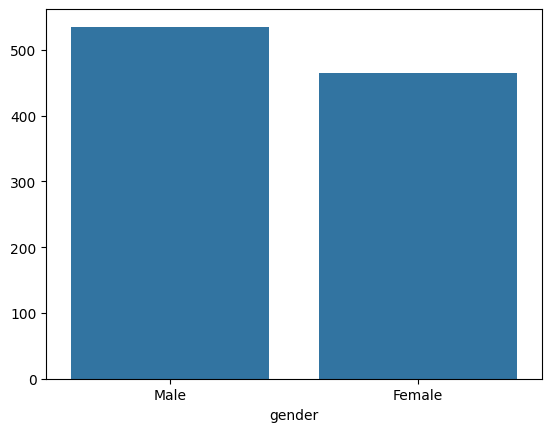

In [30]:
genders = data.gender.value_counts()
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Text(0.5, 9.444444444444438, 'Range of Age')

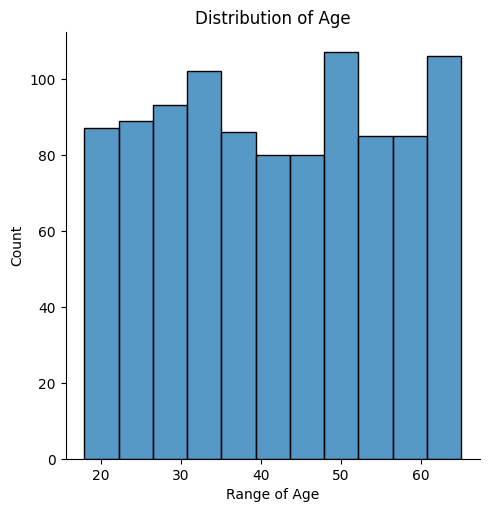

In [31]:
sns.displot(data['age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')

Text(0.5, 9.444444444444438, 'Range of Annual Income')

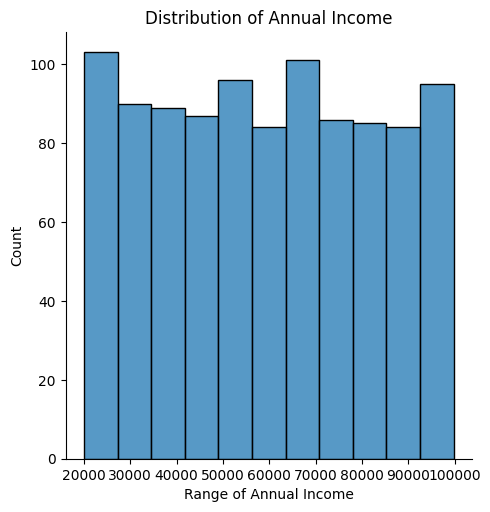

In [32]:
sns.displot(data['annual_income'])
plt.title('Distribution of Annual Income')
plt.xlabel('Range of Annual Income')

Text(0.5, 9.444444444444438, 'Range of spending frequency')

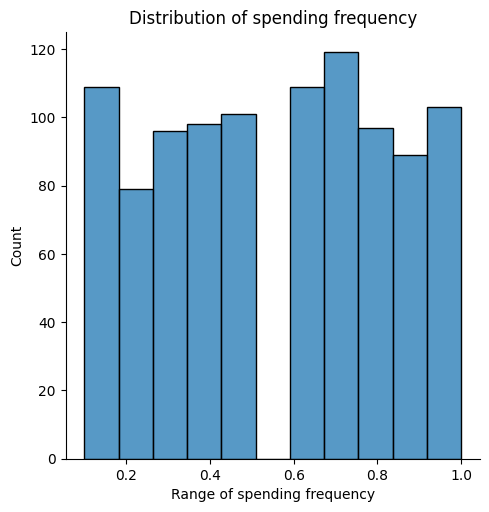

In [33]:
sns.displot(data['spending_frequency'])
plt.title('Distribution of spending frequency')
plt.xlabel('Range of spending frequency')

Text(0.5, 9.444444444444438, 'Range of actual spending')

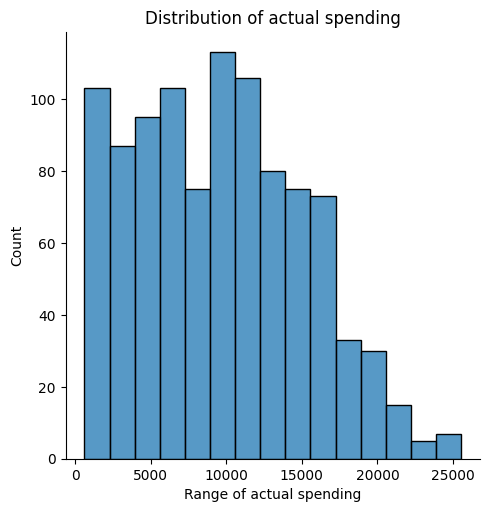

In [34]:
sns.displot(data['actual_spending'])
plt.title('Distribution of actual spending')
plt.xlabel('Range of actual spending')

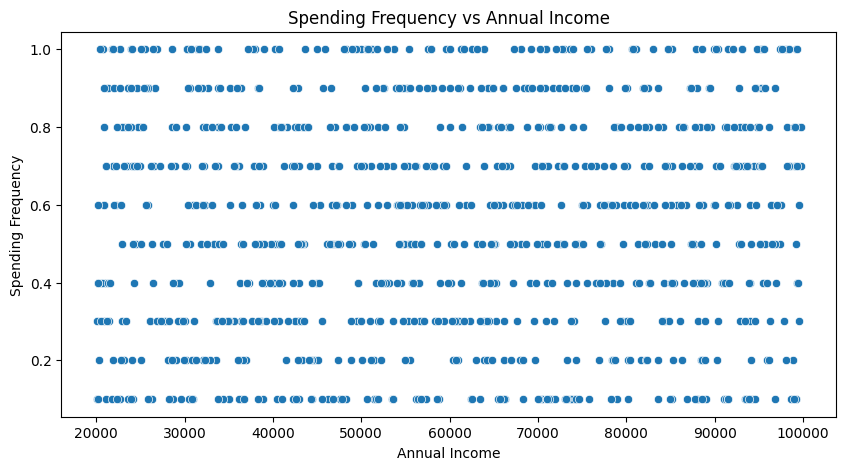

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'annual_income', y = 'spending_frequency', data = data)
plt.xlabel('Annual Income')
plt.ylabel('Spending Frequency') 
plt.title('Spending Frequency vs Annual Income')
plt.show()

## It is very Difficult to Identify Clusters in above Scatterplot. So, I have divided them into colored Clusters

In [36]:
X = data[['spending_frequency','annual_income']]
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
data['Cluster'] = kmeans_model.fit_predict(X)

## 2D Model

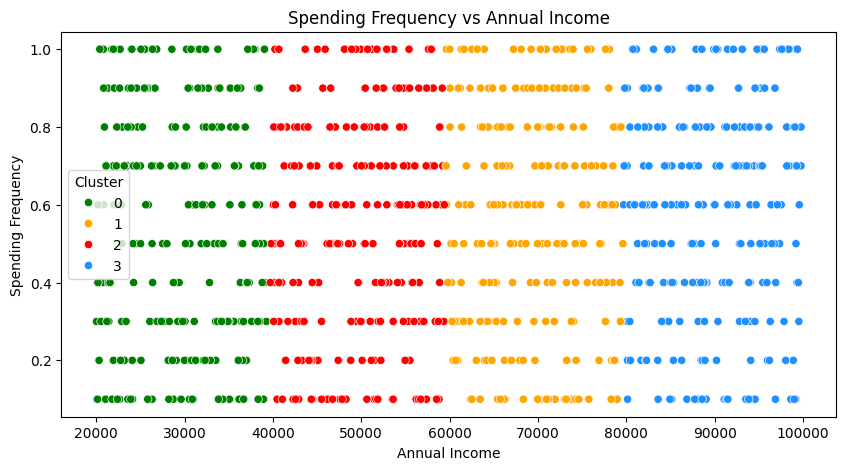

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'annual_income',y = 'spending_frequency',
                palette=['green','orange','red','dodgerblue'],
                legend='full',data = data,hue='Cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Frequency') 
plt.title('Spending Frequency vs Annual Income')
plt.show()

## 3D Model

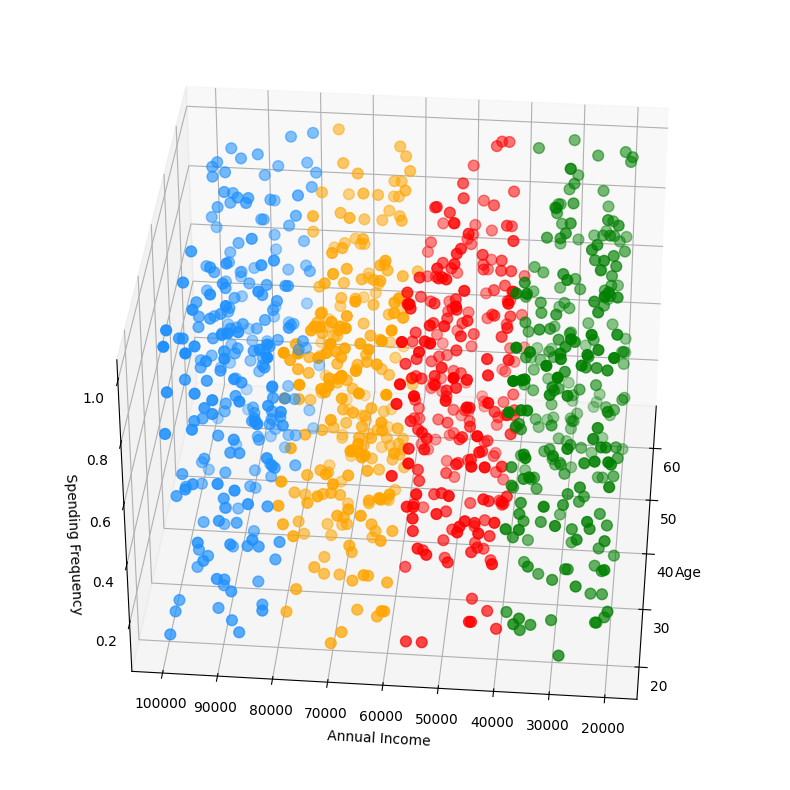

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.age[data.Cluster == 0], data["annual_income"][data.Cluster == 0], data["spending_frequency"][data.Cluster == 0], c='green', s=60)
ax.scatter(data.age[data.Cluster == 1], data["annual_income"][data.Cluster == 1], data["spending_frequency"][data.Cluster == 1], c='orange', s=60)
# ax.scatter(data.age[data.Cluster == 2], data["annual_income"][data.Cluster == 2], data["spending_frequency"][data.Cluster == 2], c='brown', s=60)
ax.scatter(data.age[data.Cluster == 2], data["annual_income"][data.Cluster == 2], data["spending_frequency"][data.Cluster == 2], c='red', s=60)
ax.scatter(data.age[data.Cluster == 3], data["annual_income"][data.Cluster == 3], data["spending_frequency"][data.Cluster == 3], c='dodgerblue', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Frequency')
plt.show()

In [39]:
features = data[['annual_income','spending_frequency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

## Elbow Method

In [40]:
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    WCSS.append(kmeans.inertia_)

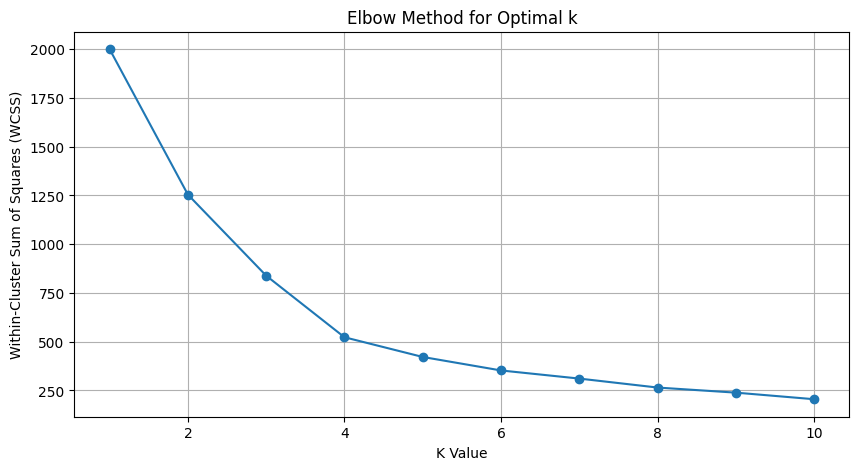

In [41]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('K Value')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()